# Predicting power consumption in cities - a multisomething AI-based approach
## GRAD-E1394 Deep Learning -- Assignment 3
Author(s):
*   Katalin Bayer, K.Bayer@students.hertie-school.org
*   Laura Menicacci, L.Menicacci@students.hertie-school.org
*   Maren Rieker, M.Rieker@students.hertie-school.org


Replace the information in this cell with a brief summary of the tutorial as well as users' expected learning outcomes.

# Table of Contents


*   [Memo](#memo)
*   [Overview](#overview)
*   [Background & Prerequisites](#background-and-prereqs)
*   [Software Requirements](#software-requirements)
*   [Data Description](#data-description)
*   [Methodology](#methodology)
*   [Results & Discussion](#results-and-discussion)
*   [References](#references)

TO DO GENERAL:
- memo 
- overview: explain the sections, goal is to provide a tool to analyse and predict energy consumption. We will analyse many methods --> final product will be interactive plot that users can play with to oversee past and future predictions (?) + provide an overview of which methods are the best
- background and prerequisites: knowledge of basic terms for time series analysis (briefly explain them) + knowledge of statistical models either briefly explain or provide external link (to slides, to video) for explanation; knowledge of RNN, LSTM, in general basic
- add reading material in the literature folder (laura)
- software requirements
- data description: look at google doc and cite --> important to make exploratory analysis w interactive plots! see link on google doc
- methodology: baseline models, lstm approach, rnn approach 
- results: plots, & explanation of them
- discussion: provide explanation of when it's better to use deep learning and possible extension of applications in this area --> basically any time series. 

# Software requirements

This notebook requires Python >= 3.7. The following libraries are required:
*   pandas
*   numpy
*   matplotlib

In [1]:
# !pip install pandas numpy matplotlib 

In [87]:
# Data manipulation 
import pandas as pd
import numpy as np

# Data visualization 
import matplotlib.pyplot as plt
# import chart-studio

#Stationarity test 
from statsmodels.tsa.stattools import adfuller

#Auto-Correlation tests 
from statsmodels.graphics.tsaplots import plot_acf      # -> (ACF Plot)
from statsmodels.stats.stattools import durbin_watson   # -> (Durbin Watson Test Statistic)

# sklearn useful libraries
import sklearn

# RNN implementation 


# LSTM implementation 
from sklearn.preprocessing import MinMaxScaler      # -> Rescale Data for LSTM pipeline
from keras.preprocessing.sequence import TimeseriesGenerator    
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Data Description

## Data Download

Our dataset is easily downloadable from

In [3]:
data = pd.read_csv("Tetuan City power consumption.csv")

In [4]:
data.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [ ]:
# table w n of rows and n of variables

In [5]:
# Statistical information about the dataset
data.describe(include=[np.number], percentiles=[.5]) \
    .transpose().drop("count", axis=1)

,mean,std,min,50%,max
Temperature,18.810024,5.815476,3.247000,18.780000,40.01000
Humidity,68.259518,15.551177,11.340000,69.860000,94.80000
Wind Speed,1.959489,2.348862,0.050000,0.086000,6.48300
general diffuse flows,182.696614,264.400960,0.004000,5.035500,1163.00000
diffuse flows,75.028022,124.210949,0.011000,4.456000,936.00000
Zone 1 Power Consumption,32344.970564,7130.562564,13895.696200,32265.920340,52204.39512
Zone 2 Power Consumption,21042.509082,5201.465892,8560.081466,20823.168405,37408.86076
Zone 3 Power Consumption,17835.406218,6622.165099,5935.174070,16415.117470,47598.32636


Include small description!

## Data exploration

In [6]:
# small preprocessing 
data_small = data.iloc[:1500] # take first 1500 rows
data_small1 = data_small.drop(['DateTime', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'], axis=1) # remove first column of datetime

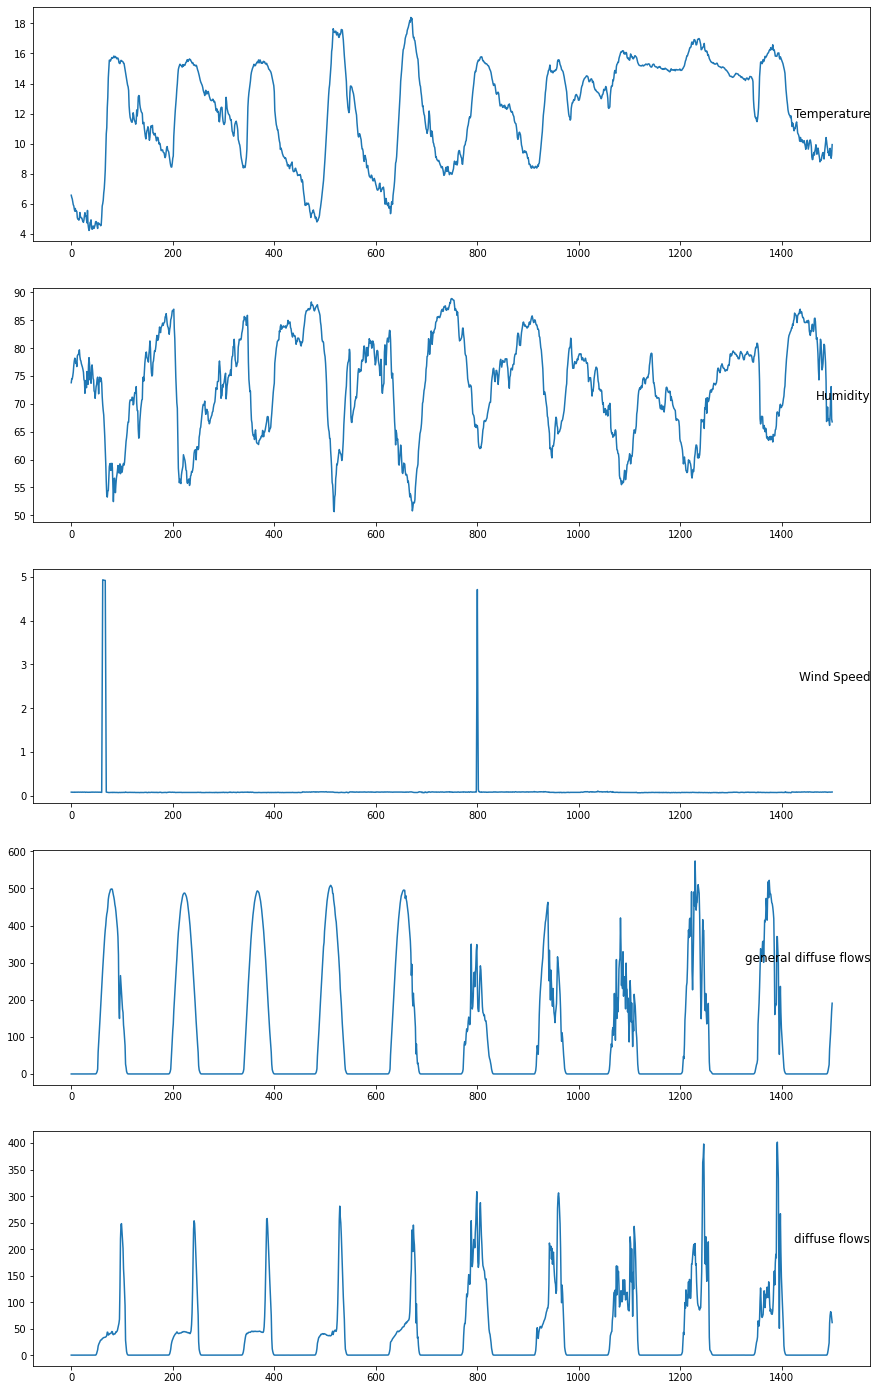

In [7]:
# Plot each column of variable for the first 1500 rows

values = data_small1.values

groups = [0, 1, 2, 3, 4] #number of variables
i = 1

plt.figure(figsize = (15, 25))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(data_small1.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [31]:
data_small.iloc[:,0]

data_small['DateTime'] = pd.to_datetime(data_small['DateTime'], infer_datetime_format = True)
data_indexed = data_small.set_index(['DateTime']) 

data_small.iloc[1:5,0]

<ipython-input-31-5dd80b35eae0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_small['DateTime'] = pd.to_datetime(data_small['DateTime'], infer_datetime_format = True)


1   2017-01-01 00:10:00
2   2017-01-01 00:20:00
3   2017-01-01 00:30:00
4   2017-01-01 00:40:00
Name: DateTime, dtype: datetime64[ns]

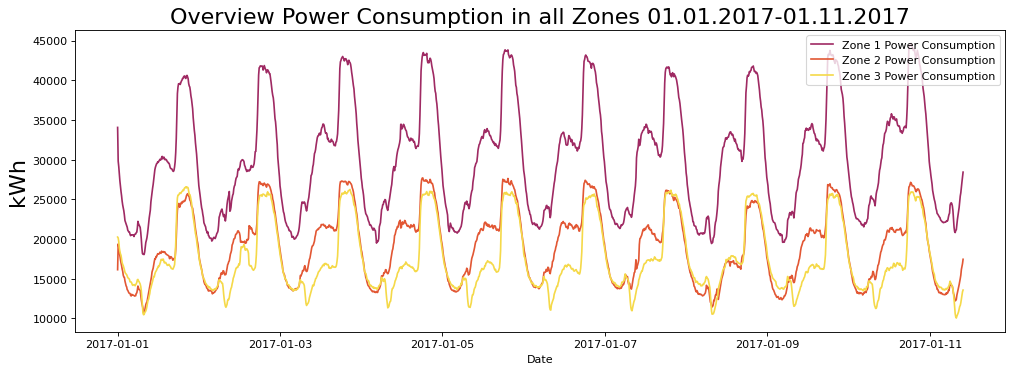

In [34]:
# Plot one of the target variables for the whole dataset
d = data_small['Zone 1 Power Consumption']
e = data_small['Zone 2  Power Consumption']
f = data_small['Zone 3  Power Consumption']
x=data_small['DateTime']
plt.figure(figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca() 


line1, = plt.plot(x, d,color = '#9f2a63',label='Zone 1 Power Consumption')
line2, = plt.plot(x, e, color = '#e25734', label = 'Zone 2 Power Consumption')
line3, = plt.plot(x, f, color = '#f5d949', label = 'Zone 3 Power Consumption')


plt.title('Overview Power Consumption in all Zones 01.01.2017-01.11.2017', fontsize=20)
plt.xlabel('Date')
plt.ylabel('kWh', fontsize=20)
plt.legend(loc=1, prop={'size': 10})
plt.show()

## Interactive plot --> Do we delete these cells?

In [ ]:
!pip install plotly==5.11.0


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\laura\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import chart_studio.plotly as py

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default='notebook'

In [ ]:
data_ind = data_small.set_index(["DateTime"])

In [ ]:
zone2.values

array([34055.6962 , 29814.68354, 29128.10127, ..., 27171.64557,
       27785.31646, 28423.29114])

In [ ]:
power_data = go.Scatter(x=data_ind.index,  y=data_ind['Zone 1 Power Consumption'].values)

layout = go.Layout(height=600, width=800,
                   title='Energy Plot',
                   # Same x and first y
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Zone 1', color='red'))

fig = go.Figure(data=[power_data], layout=layout)

fig.show()

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: on


## Data preparation

In [35]:
# set datetime as index 
data_ind = data.set_index(["DateTime"]) 

power = data

In [36]:
#Formatting the columns
power["DT"] = pd.to_datetime(power["DateTime"])
power.columns = power.columns.str.replace(' ', '')
power=power.rename(columns={"generaldiffuseflows": "GeneralDiffuseFlows", "diffuseflows": "DiffuseFlows", "Zone1PowerConsumption":"Zone1", "Zone2PowerConsumption":"Zone2","Zone3PowerConsumption":"Zone3"})

#Aggregate consumption
power["MeanConsumption"] = power[['Zone1', 'Zone2', 'Zone3']].mean(axis=1)

#Inserting dummy variables for temporal data -- some of these may be redundant
power["Month"]=pd.DatetimeIndex(power['DT']).month
power["Day"]=pd.DatetimeIndex(power['DT']).day # returns day of month from 1 to 31
power["DayOfWeek"]=pd.DatetimeIndex(power['DT']).weekday # day of week from 0 to 6
power["Weekday"] = (pd.DatetimeIndex(power['DT']).weekday < 5).astype(int) # 1-0 dummy for weekday or not
power["Hour"]=pd.DatetimeIndex(power['DT']).hour
power["Week"]=pd.DatetimeIndex(power['DT']).week

#Seasons: 
seasons = [1,1,2,2,2,3,3,3,4,4,4,1]
month_to_season = dict(zip(range(1,13), seasons))
power["Season"]=power.DT.dt.month.map(month_to_season) 

<ipython-input-36-d9436e29e902>:15: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  power["Week"]=pd.DatetimeIndex(power['DT']).week


In [37]:
#Creating a new dataframe with hourly aggregates
power_hour = power.groupby(["Month", "Day", "Hour"], as_index=False).mean().copy()
power_hour["Year"] = 2017
power_hour["DT"] = pd.to_datetime(power_hour[["Year", "Month", "Day", "Hour"]])
power_hour = power_hour.set_index('DT')

In [38]:
power_hour.head(10)
power_hour.shape

(8736, 17)

In [39]:
# MAYBE DELETE THIS CELL!!!

#X = power_hour.loc[:, ["Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", 
#                      "DiffuseFlows", "Season", "Month", "Hour", "DayOfWeek"]]
#print(X, "\n")

#y = power_hour.loc[:, ["MeanConsumption"]]
#print("\n", y)

                     Temperature   Humidity  WindSpeed  GeneralDiffuseFlows  \
DT                                                                            
2017-01-01 00:00:00     6.196833  75.066667   0.081833             0.063500   
2017-01-01 01:00:00     5.548833  77.583333   0.082000             0.056833   
2017-01-01 02:00:00     5.054333  78.933333   0.082333             0.063000   
2017-01-01 03:00:00     5.004333  77.083333   0.082833             0.059833   
2017-01-01 04:00:00     5.097667  74.050000   0.082333             0.058000   
...                          ...        ...        ...                  ...   
2017-12-30 19:00:00     9.453333  62.406667   0.074667             0.052000   
2017-12-30 20:00:00     9.041667  63.990000   0.080333             0.052667   
2017-12-30 21:00:00     8.011667  69.675000   0.081500             0.073167   
2017-12-30 22:00:00     7.598333  70.315000   0.081833             0.058667   
2017-12-30 23:00:00     6.877500  72.900000   0.0815

#Visually Inspect Time Series for Stationarity 
In the **parametric inference** approach (which we are taking in this tutorial) , it is assumed that the underlying stationary stochastic process has a certain structure.

In the case of time series modeling, the expectation is that the data generating process can be described with only a few parameters - primarily **AR** and **MA lags**.

By contrast, in **non-parametric inference** approaches, the covariance of the process is estimated, without assuming any specifc underlying samppling from a distribution with a particular structure - hence, non-parametric.

###Parametric Approach -> Stationarity Assumption
**Stationarity is a stochastic process whose unconditional probability distribution does not change across time, for any two observations in the data.** The direct implication is that parameters such as mean and variance do not change over time. 

Visually, stationarity is satisfied when a line can be drawn through the middle of the time series and it is flat - seasonal cycles are allowed but there should not be any obvious updwards or downwards trends across time.


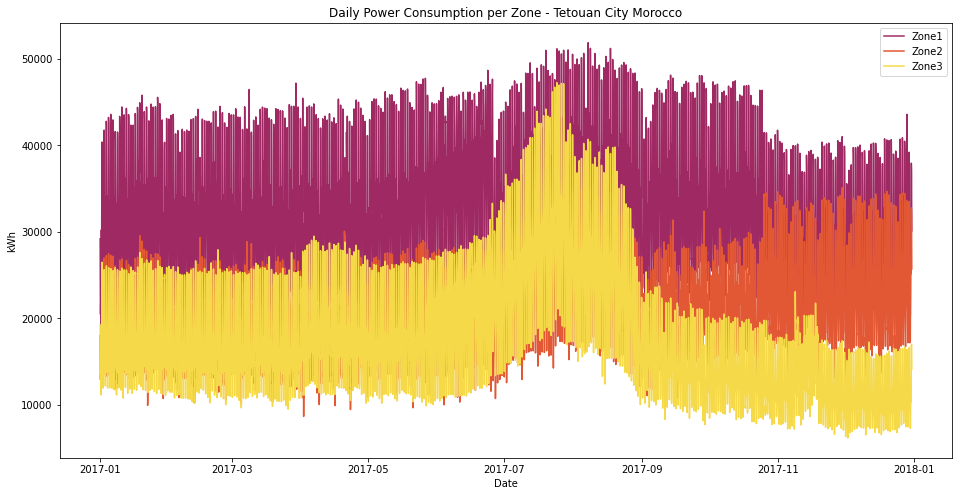

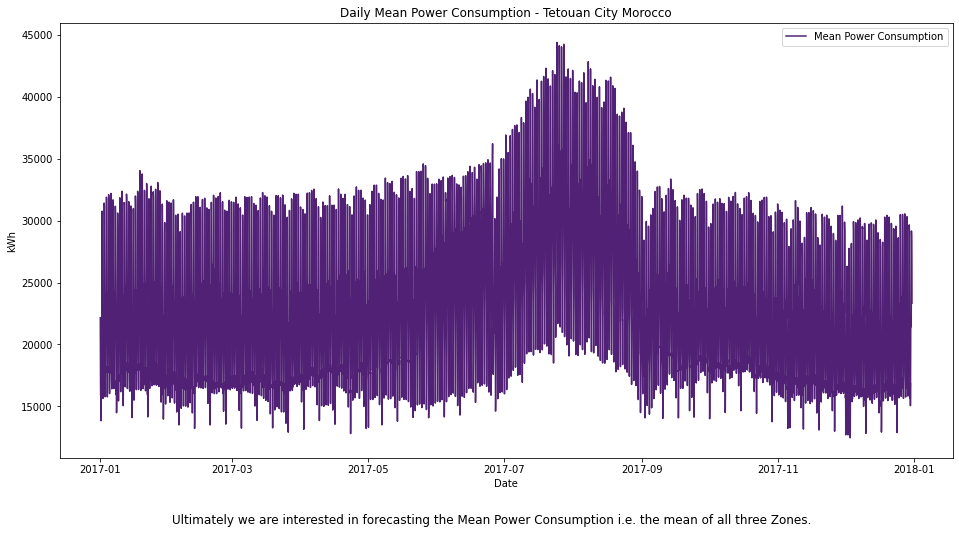

In [59]:
#Plotting energy consumption per datetime for each of the three zones. 
x=power_hour.index
y1=power_hour["Zone1"]
y2=power_hour["Zone2"]
y3=power_hour["Zone3"]

plt.figure(figsize=(16,8))
plt.plot(x, y1, label = "Zone1", color="#9f2a63")
plt.plot(x, y2, label = "Zone2", color="#e25734")
plt.plot(x, y3, label = "Zone3",color ="#f5d949")

plt.xlabel('Date')
plt.ylabel('kWh')
plt.title("Daily Power Consumption per Zone - Tetouan City Morocco")
plt.legend()
#plt.savefig('Total_Power_Consumption.png',bbox_inches='tight', dpi=150)
plt.show()

z=power_hour["MeanConsumption"]

plt.figure(figsize=(16,8))
plt.plot(x, z, label = "Mean Power Consumption", color="#3d0965", alpha = 0.9)

plt.xlabel('Date')
plt.ylabel('kWh')
plt.title("Daily Mean Power Consumption - Tetouan City Morocco")
plt.figtext(0.5, 0.01, 'Ultimately we are interested in forecasting the Mean Power Consumption i.e. the mean of all three Zones.', wrap=True,  horizontalalignment='center', fontsize=12)
plt.legend()
#plt.savefig('Total_Power_Consumption.png',bbox_inches='tight', dpi=150)
plt.show()


Evidentally, our time series is not stationary are there are some strong trends present in the time frame between July and September 2017, which disrupt the otherwise fairly stationary data.

##Statistical Test for Stationarity

It is always useful to test whether stationarity is satisfied using a statistical test in addition to inspecting the data visually. Most commonly an **Augmented Dickey Fuller (ADF) Test** is carried out.  

- H0: a unit root is present in a time series sample -> the time series is **not** stationary.
- H1: we have stationarity or trend-stationarity.

The resulting test statistic is a negative number, the more negative the value is, the more confidently we reject the null hypothesis, that a unit root is present in our data. 


In [47]:
#Calculates statistics for target variable
print(adfuller(power_hour["MeanConsumption"]))

(-2.573768830541299, 0.09854080867954679, 37, 8698, {'1%': -3.4311020385052733, '5%': -2.8618723508056814, '10%': -2.566946905374546}, 128372.67391899043)


###Interpreting the ADF Test results
(ADF Test statistic, p-value, number of lags in Regression to Determine the t-statistic, number of observations, {T values corresponding to the ADF Test})

Since in our case, the critical value falls between '5%': -2.861 < **-2.57** < '10%': -2.56, we could not reject the null hypothesis at  the 5% confidence interval. 

Hence, as expected on the basis of the visualisation, we now have the statistical confirmation that our time series is not stationary. **Therefore, before proceeding with any modeling, we must transform the data set into a stationary one.**

The standard approach is to simply take the differenced mean of the variable of interest, and to then re-test for stationarity. **By taking the differenced mean we can remove time specifc trends** in the data as we consider the difference between observations at time_t and time_t+1 as opposed to actual observed power consumption. 


#Turning the data set stationary
Calculating the 1 hour differentiated mean and adding it as 1-hour, 2-hours and 24-hour lags on the covariates dataset.

In [50]:
def differencingTimeSeries(dataY):
  dataY['diff_mean_1'] = dataY['MeanConsumption'].diff(periods=1)
  dataY['diff_mean_Zone1'] = dataY['Zone1'].diff(periods=1)
  dataY['diff_mean_Zone2'] = dataY['Zone2'].diff(periods=1)
  dataY['diff_mean_Zone3'] = dataY['Zone3'].diff(periods=1)
  

def LaggingTimeSeries(dataX, dataY):
  dataX['lagged_mean_1'] = dataY['diff_mean_1'].shift(1)
  dataX['lagged_mean_2'] = dataY['diff_mean_1'].shift(2)
  dataX['lagged_mean_24'] = dataY['diff_mean_1'].shift(24)
  dataX['lagged_mean_1_Zone1'] = dataY['diff_mean_Zone1'].shift(1)
  dataX['lagged_mean_2_Zone1'] = dataY['diff_mean_Zone1'].shift(2)
  dataX['lagged_mean_24_Zone1'] = dataY['diff_mean_Zone1'].shift(24)  
  dataX['lagged_mean_1_Zone2'] = dataY['diff_mean_Zone2'].shift(1)
  dataX['lagged_mean_2_Zone2'] = dataY['diff_mean_Zone2'].shift(2)
  dataX['lagged_mean_24_Zone2'] = dataY['diff_mean_Zone2'].shift(24)  
  dataX['lagged_mean_1_Zone3'] = dataY['diff_mean_Zone3'].shift(1)
  dataX['lagged_mean_2_Zone3'] = dataY['diff_mean_Zone3'].shift(2)
  dataX['lagged_mean_24_Zone3'] = dataY['diff_mean_Zone3'].shift(24)

In [51]:
stationary_power = power_hour
stationary_power.info

#Using the differentiating and lagging function to calculate lags in the training set
differencingTimeSeries(stationary_power)
LaggingTimeSeries(stationary_power,stationary_power)


#Retesting the Differenced Mean Time Series for Stationarity 

The results below show that the trasnformation yielded a success. We now strongly reject the null of a unit root being present, and also visually it is clear that there are no obvious time series trends. 



(-21.61779516817581, 0.0, 37, 8697, {'1%': -3.431102125001841, '5%': -2.86187238902655, '10%': -2.566946925719781}, 140517.47824772936)


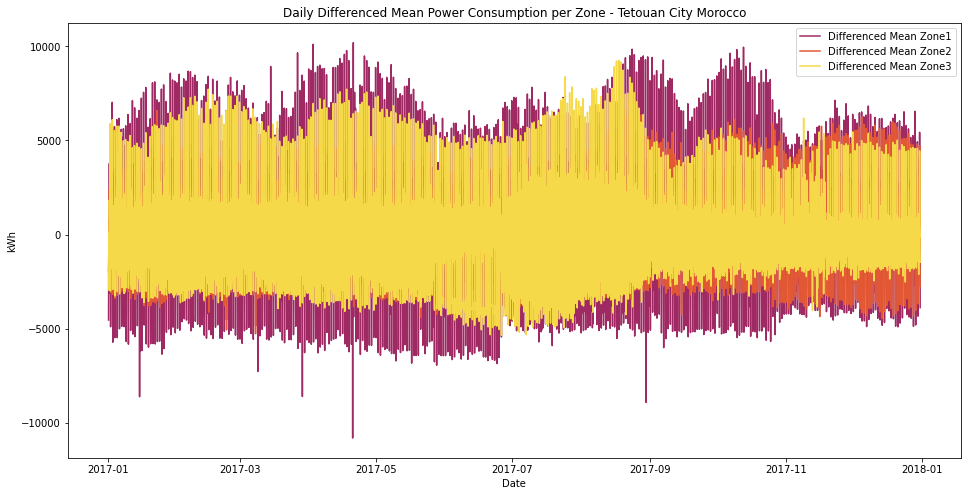

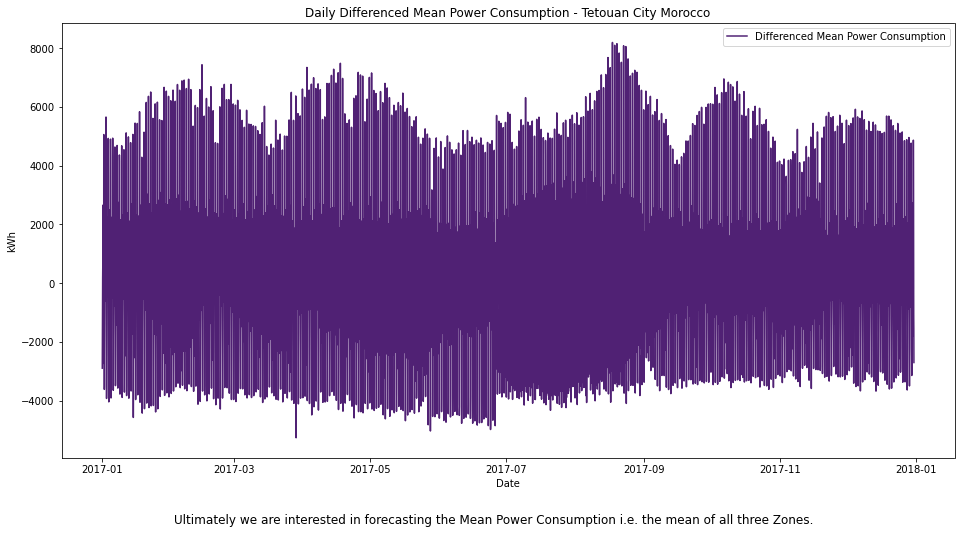

In [144]:
#Calculates statistics for the differentiated mean to check if it is in fact stationary.
diff_mean=stationary_power["diff_mean_Zone1"].iloc[1:]
print(adfuller(diff_mean))

#Plotting energy consumption per datetime for each of the three zones. 
x=stationary_power.index
y1=stationary_power["diff_mean_Zone1"]
y2=stationary_power["diff_mean_Zone2"]
y3=stationary_power["diff_mean_Zone3"]

plt.figure(figsize=(16,8))
plt.plot(x, y1, label = "Differenced Mean Zone1", color="#9f2a63")
plt.plot(x, y2, label = "Differenced Mean Zone2", color="#e25734")
plt.plot(x, y3, label = "Differenced Mean Zone3",color ="#f5d949")

plt.xlabel('Date')
plt.ylabel('kWh')
plt.title("Daily Differenced Mean Power Consumption per Zone - Tetouan City Morocco")
plt.legend()
#plt.savefig('Total_Power_Consumption.png',bbox_inches='tight', dpi=150)
plt.show()

z=stationary_power["diff_mean_1"]

plt.figure(figsize=(16,8))
plt.plot(x, z, label = "Differenced Mean Power Consumption", color="#3d0965", alpha = 0.9)

plt.xlabel('Date')
plt.ylabel('kWh')
plt.title("Daily Differenced Mean Power Consumption - Tetouan City Morocco")
plt.figtext(0.5, 0.01, 'Ultimately we are interested in forecasting the Mean Power Consumption i.e. the mean of all three Zones.', wrap=True,  horizontalalignment='center', fontsize=12)
plt.legend()
#plt.savefig('Total_Power_Consumption.png',bbox_inches='tight', dpi=150)
plt.show()


In [143]:
stationary_power.diff_mean_1
#Calculates statistics for target variable
print(adfuller(stationary_power.diff_mean_1[1:]))

(-21.260096816271574, 0.0, 37, 8697, {'1%': -3.431102125001841, '5%': -2.86187238902655, '10%': -2.566946925719781}, 128362.19511047818)


#Testing for Auto-Correlation

###Inspecting the Auto-Correlation Function (AFC) plot
####Key Assumption of AFC: 

- weak stationarity

If our data is stationary, that implies that the mean and variance of the time series is constant, this means that across time there is no correlation.
Therefore, we plot the Auto-Correlation Function for the original time series as opposed to the differenced mean series. 

####How to interpret Results:
In the plot below we notice that the peaks repeat at the 24 and 48 hour lags -> makes sense, we would expect power consumption of the day and two days prior to be highly correlated with today's power consumption.

<Figure size 1152x576 with 0 Axes>

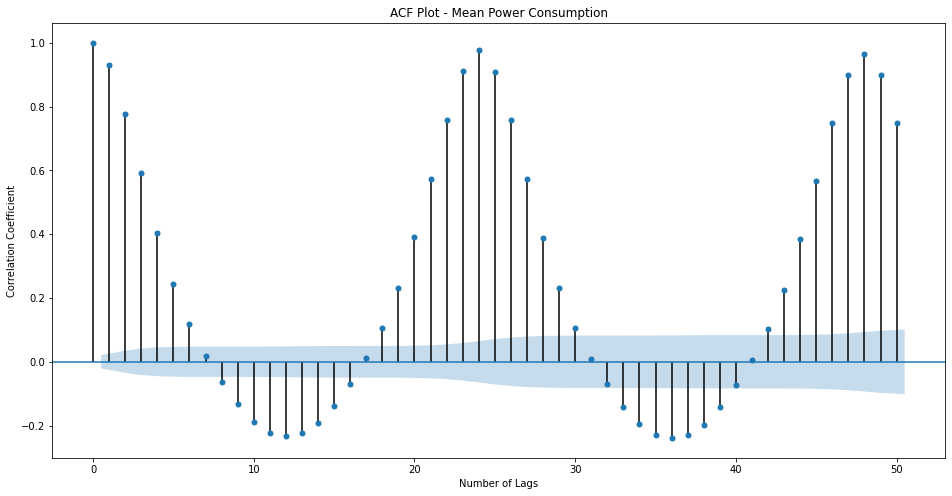

In [64]:
plt.figure(figsize=(16,8))
plot_acf(power_hour.MeanConsumption, lags = 50)

plt.xlabel('Number of Lags')
plt.ylabel('Correlation Coefficient')
plt.title("ACF Plot - Mean Power Consumption")
#plt.savefig('Total_Power_Consumption.png',bbox_inches='tight', dpi=150)
plt.show()


###Testing for Auto-Correlation with the Durbin-Watson Test
The second method to measure the autocorrelation of residuals in Python: is by performing the Durbin-Watson test. Note that this only test for a lag of first order (i.e. correlation w.r.t. observation_t-1, corresponding to an AR(1) model).

####The Hypotheses for the Durbin Watson test are:

H0 = no first order autocorrelation, and H1 = first order correlation exists.

####Key Assumptions are:

- Errors are normally distributed with a mean of 0
- Errors are stationary

Again, apply this test after the time series has been stationarized.

####How to interpret results:
The Durbin Watson test reports a test statistic, with a value from 0 to 4, where:

2 is no autocorrelation.
(0, 2) is positive autocorrelation (common in time series data).
(2, 4) is negative autocorrelation (less common in time series data).

As a rule of thumb, test statistic values that fall between (1.5, 2.5) are considered as relatively normal. Any values falling outside of this range suggests we should reject the null hypothesis.

####Our results:
A DW test statistic of approximately 0.007440 is a very strong indicator for positive autocorrelation and we reject the Null Hypothesis that no Auto-Correlation of first order is present.  

In [70]:
#perform Durbin-Watson test
durbin_watson(power_hour.MeanConsumption)

0.007438971306829517

# Benchmark Time Series Model (ARIMA)

Statistical Time Series Models without any Deep Learning components. 

In [71]:
def show_fit_report(pred, test, title):
  # Plot outputs
  x = np.arange(min(len(pred), len(test)))
  plt.figure(figsize=(16,8))
  plt.scatter(x, test[x], color = "black", s = 4, alpha = 0.8, label = "Actual values")
  plt.plot(x, pred[x], color="blue", linewidth = 0.5, alpha = 0.7, label='Predicted values')

  plt.xlabel('Number of Forecasted Observations')
  plt.ylabel('Energy consumption (kWh)')
  plt.title(title)
  plt.xticks()
  plt.yticks()
  plt.legend()
  plt.show()
  
def show_fit(pred, test):
    x = np.arange(min(len(pred), len(test)))
    plt.figure(figsize=(16,8))
    plt.scatter(x, test[x])
    plt.plot(x, pred[x])
    plt.show()
    
def roos_train(y_train, model, method, maxtrain):
    MAX_MODEL_CONDITION = 1e15
    n = min(maxtrain, len(y_train))
    try:
        print("Try estimating model")
        model.fit(y_train[-n:])
        model_condition = np.linalg.cond(model.arima_res_.cov_params())
        print("Model condition:", model_condition)
        if model_condition > MAX_MODEL_CONDITION:
            raise
    except:
        try:
            print("Try creating model")
            model = auto_arima(y_train[-n:], 
                             m=24, with_intercept=True,
                             trace=True, suppress_warnings=True,
                             method=method, error_action='ignore')
            model_condition = np.linalg.cond(model.arima_res_.cov_params())
            print("Model condition:", model_condition)
        except:
            print("WARNING: Model not created/estimated")
    return model

def roos_forecast(y_test, horizon, model):
    y_predict = []
    cut = 0
    n = len(y_test)
    while cut + horizon < n:
        y_predict = np.append(y_predict, model.predict(horizon))
        cut = cut + horizon
        print("forecast upto:", cut)
        model.update(y_test[cut-horizon:cut])
    # process remaining observations
    y_predict = np.append(y_predict, model.predict(n-cut))
    model.update(y_test[cut:n])
    assert len(y_predict) == n
    return y_predict
    
def roos_arima(y, n_est=8, horizon=24, method='powell', maxtrain=24*120):
    y_oos = np.full(len(y), np.NaN)
    tscv = TimeSeriesSplit(n_est)
    model = None
    for train_index, test_index in tscv.split(y):
        print("TRAIN:", train_index[0], train_index[-1], "TEST:", test_index[0], test_index[-1])
        model = roos_train(y.iloc[train_index], model, method, maxtrain)
        print(model.summary())
        y_predict = roos_forecast(y.iloc[test_index], horizon, model)
        y_oos[test_index] = y_predict
        show_fit(y_predict, y.iloc[test_index].values)
    print(model.summary())
    return y_oos


# When Run = True: Run the procedure, first for each zone, then for the total, or reload
# When Run = False: the saved results from the github repo are loaded into the code, 
# based on the results of a previous run of the entire model. Currently run = False to
# prevent excessive running time.
run = False
save_results = False
if run:    
    fc_Zone1 = roos_arima(power_hour.loc[:, ["Zone1"]])
    if save_results: fc_Zone1.tofile("Zone1.bnf")
    fc_Zone2 = roos_arima(power_hour.loc[:, ["Zone2"]])
    if save_results: fc_Zone2.tofile("Zone2.bnf")
    fc_Zone3 = roos_arima(power_hour.loc[:, ["Zone3"]])
    if save_results: fc_Zone3.tofile("Zone3.bnf")
    fc_Mean = roos_arima(power_hour.loc[:, ["MeanConsumption"]])
    if save_results: fc_Mean.tofile("Mean.bnf")
else:
    fc_Zone1 = np.fromfile("Zone1.bnf")
    fc_Zone2 = np.fromfile("Zone2.bnf")
    fc_Zone3 = np.fromfile("Zone3.bnf")
    fc_Mean = np.fromfile("Mean.bnf")

# Evaluate results    
n_NaN = len(fc_Mean[np.isnan(fc_Mean)])
y = power_hour.loc[:, ["MeanConsumption"]].values.reshape(-1)
fc_Comp = (fc_Zone1 + fc_Zone2 + fc_Zone3)/3
fc_Naive = np.array([np.NaN if i < n_NaN else y[i-24] for i in np.arange(len(y))])

from math import sqrt
def rmse(e, first=0): return sqrt(np.mean(np.square(e[first:])))
def mae(e, first=0): return np.mean(np.abs(e[first:]))
def mse(e,first=0): return np.mean(np.square(e[first:]))

print("RMSEs:")
print("Naive\t\t", rmse(y - fc_Naive, n_NaN))
print("Direct\t\t", rmse(y - fc_Mean, n_NaN))
print("Composite\t", rmse(y - fc_Comp, n_NaN))

print("MAEs:")
print("Naive\t\t", mae(y - fc_Naive, n_NaN))
print("Direct\t\t", mae(y - fc_Mean, n_NaN))
print("Composite\t", mae(y - fc_Comp, n_NaN))

print("MSEs:")
print("Naive\t\t", mse(y - fc_Naive, n_NaN))
print("Direct\t\t", mse(y - fc_Mean, n_NaN))
print("Composite\t", mse(y - fc_Comp, n_NaN))


RMSEs:
Naive		 1152.5012354728833
Direct		 966.150731463122
Composite	 975.379931186991
MAEs:
Naive		 760.18744189186
Direct		 669.5599602138535
Composite	 681.4591806187115
MSEs:
Naive		 1328259.0977665223
Direct		 933447.2359067259
Composite	 951366.0101623393


#Plotting Time Series Forecasts for Benchline Model
###Plotting Forecasts for Entire Horizon 

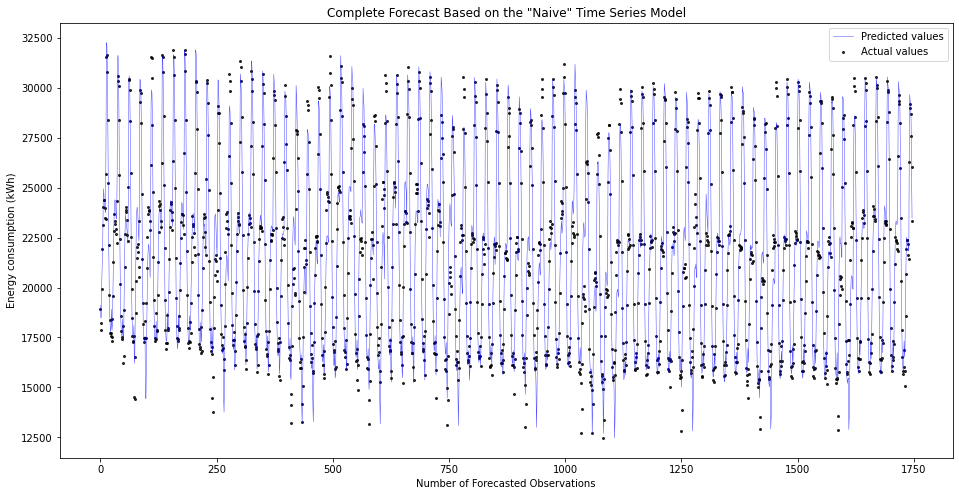

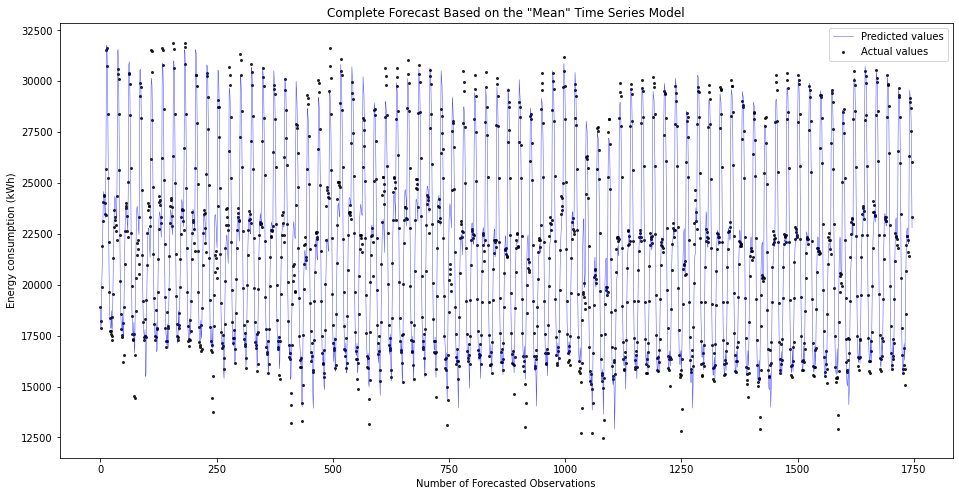

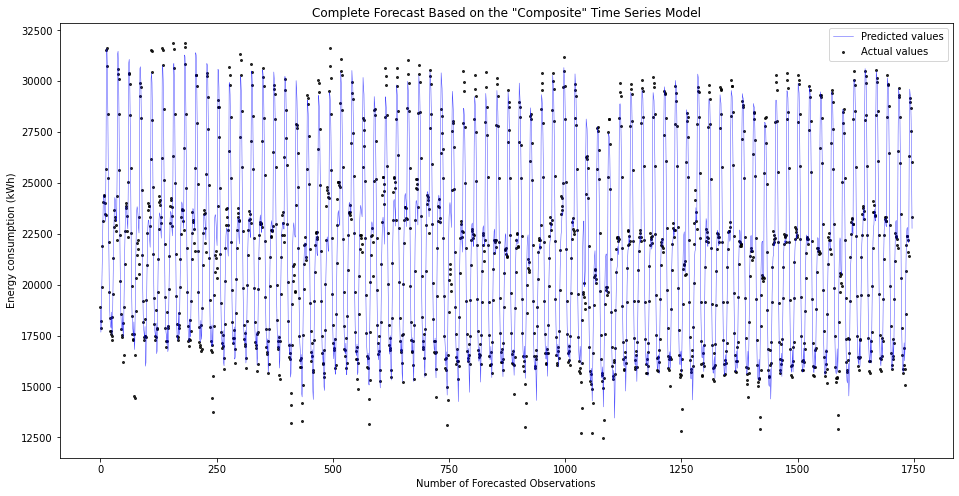

In [72]:
y = power_hour.loc[:, ["MeanConsumption"]].values.reshape(-1)
u = power_hour.loc[:, ["Zone1"]].values.reshape(-1)
v = power_hour.loc[:, ["Zone2"]].values.reshape(-1)
w = power_hour.loc[:, ["Zone3"]].values.reshape(-1)
n_oos = 1747

show_fit_report(fc_Naive[-n_oos:], y[-n_oos:], 'Complete Forecast Based on the "Naive" Time Series Model')
show_fit_report(fc_Mean[-n_oos:], y[-n_oos:], 'Complete Forecast Based on the "Mean" Time Series Model')
#show_fit_report(fc_Zone1[-n_oos:], u[-n_oos:], 'Forecast for Zone 1 Based on the "Mean" Time Series Model')
#show_fit_report(fc_Zone2[-n_oos:], v[-n_oos:], 'Forecast for Zone 2 Based on the "Mean" Time Series Model')
#show_fit_report(fc_Zone3[-n_oos:], w[-n_oos:], 'Forecast for Zone 3 Based on the "Mean" Time Series Model') #combing these three forecasts yields the composite forecast
show_fit_report(fc_Comp[-n_oos:], y[-n_oos:], 'Complete Forecast Based on the "Composite" Time Series Model')

###Plotting Forecasts for Last Week of Observations Only

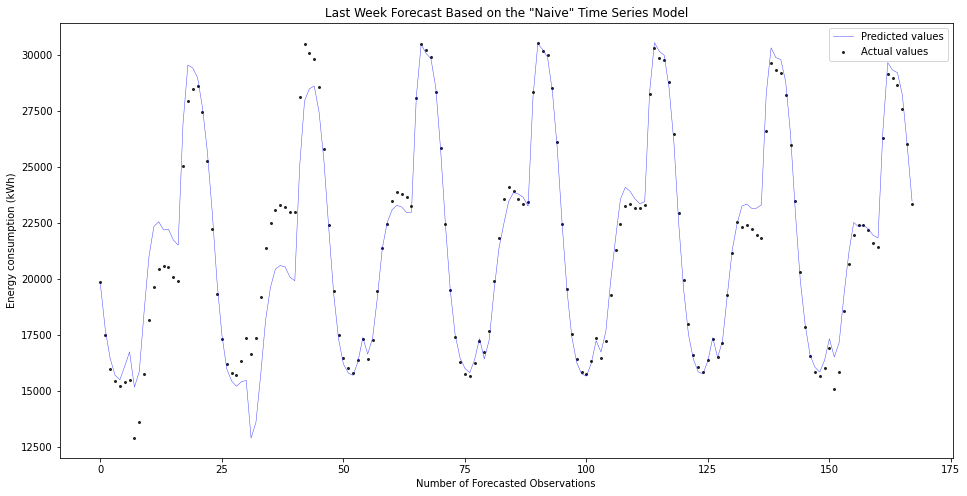

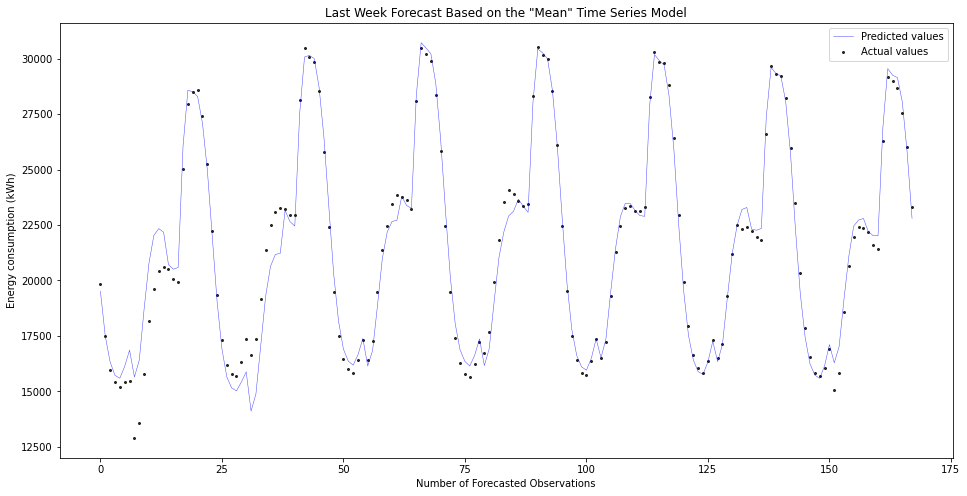

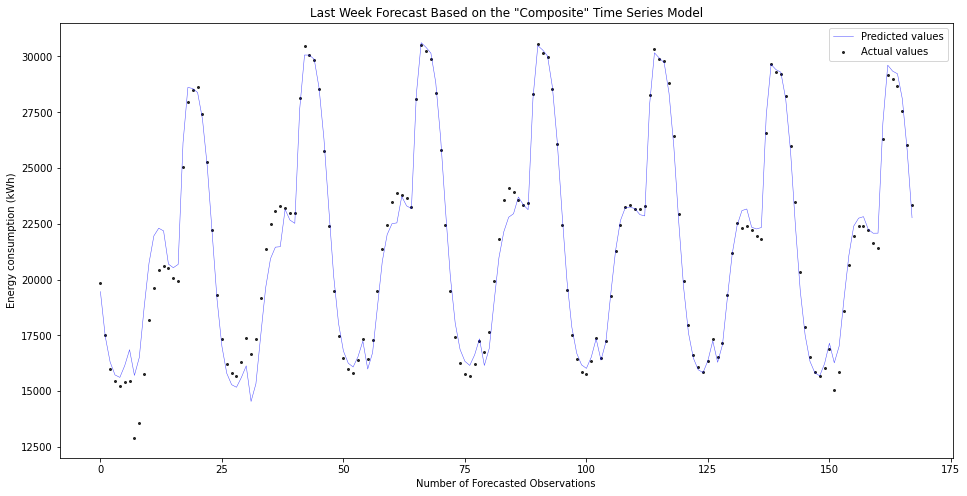

In [73]:
y = power_hour.loc[:, ["MeanConsumption"]].values.reshape(-1)
u = power_hour.loc[:, ["Zone1"]].values.reshape(-1)
v = power_hour.loc[:, ["Zone2"]].values.reshape(-1)
w = power_hour.loc[:, ["Zone3"]].values.reshape(-1)
n_oos = 1747

show_fit_report(fc_Naive[-7*24:], y[-7*24:], 'Last Week Forecast Based on the "Naive" Time Series Model')
show_fit_report(fc_Mean[-7*24:], y[-7*24:], 'Last Week Forecast Based on the "Mean" Time Series Model')
#show_fit_report(fc_Zone1[-7*24:], u[-7*24:], 'Last Week Forecast for Zone 1 Based on the "Mean" Time Series Model')
#show_fit_report(fc_Zone2[-7*24:], v[-7*24:], 'Last Week Forecast for Zone 2 Based on the "Mean" Time Series Model')
#show_fit_report(fc_Zone3[-7*24:], w[-7*24:], 'Last Week Forecast for Zone 3 Based on the "Mean" Time Series Model') #combing these three forecasts yields the composite forecast
show_fit_report(fc_Comp[-7*24:], y[-7*24:], 'Last Week Forecast Based on the "Composite" Time Series Model')

# Implementation of LSTM Approach

first normalise data --> lstm is sensitive to input data, especially when u use sigmoid or tanh function. we have to first normalise them 

import timeseries generator because lstm expects data in a specific form: the n of inputs in the sequence --> we need the number of lags + n of features should be greater than one: is this a multivariate time series prediction??? min 10.11

We choose Mean-Squared-Error (MSE) as our primary cost function given that our dataset is of high quality, i.e., there are no outliers as a result of data errors that could otherwise result in model overfit using this error metric

In [104]:
X.info

<bound method DataFrame.info of                      Temperature   Humidity  WindSpeed  GeneralDiffuseFlows  \
DT                                                                            
2017-01-01 00:00:00     6.196833  75.066667   0.081833             0.063500   
2017-01-01 01:00:00     5.548833  77.583333   0.082000             0.056833   
2017-01-01 02:00:00     5.054333  78.933333   0.082333             0.063000   
2017-01-01 03:00:00     5.004333  77.083333   0.082833             0.059833   
2017-01-01 04:00:00     5.097667  74.050000   0.082333             0.058000   
...                          ...        ...        ...                  ...   
2017-12-30 19:00:00     9.453333  62.406667   0.074667             0.052000   
2017-12-30 20:00:00     9.041667  63.990000   0.080333             0.052667   
2017-12-30 21:00:00     8.011667  69.675000   0.081500             0.073167   
2017-12-30 22:00:00     7.598333  70.315000   0.081833             0.058667   
2017-12-30 23:00:00 

In [103]:
#Function that uses the dataset and the desired test ratio to calculate and output the training, testing and validation sets.
def split_train_test(data, test_ratio):
  test_size = int(len(data) * test_ratio)
  df_train = data[:-test_size]
  df_test = data[-test_size:]
  df_valid = df_train[-test_size:]
  df_train = df_train[:-test_size]
  return df_train, df_test, df_valid

In [105]:
#Splitting the X and y data with the splitting function
train_x, test_x, valid_x = split_train_test(stationary_power.diff_mean_1, 0.20)
train_y, test_y, valid_y = split_train_test(stationary_power.diff_mean_1, 0.20)

In [106]:
#Checking the dimensions of the training, testing and validation sets.
print("X sets dimensions.", "Training set: ", train_x.shape, ". Test set: ", test_x.shape, " . Validation set: ", valid_x.shape)
print("y sets dimensions.", "Training set: ", train_y.shape, ". Test set: ", test_y.shape, " . Validation set: ", valid_y.shape)

X sets dimensions. Training set:  (5242,) . Test set:  (1747,)  . Validation set:  (1747,)
y sets dimensions. Training set:  (5242,) . Test set:  (1747,)  . Validation set:  (1747,)


## Prep for LSTM

### Normalise data

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing.

In [107]:
# Rescale variable for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_s = scaler.fit_transform(X_train)
y_train_s = scaler.fit_transform(y_train)
X_valid_s = scaler.fit_transform(X_valid)
y_valid_s = scaler.fit_transform(y_valid)
# do the same for test

In [108]:
# Transform Data using TimeseriesGenerator - preprocessing 
n_input = 24
batch_size = 48

generatorTrain = TimeseriesGenerator(y_train_s, y_train_s, length = n_input, batch_size= batch_size)
generatorValid = TimeseriesGenerator(y_valid_s, y_valid_s, length = n_input, batch_size= batch_size)
# generatorTest = TimeseriesGenerator(train_x, train_x, length = n_input, batch_size=1)

In [109]:
np.shape(generatorTrain)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(181, 2)

In [110]:
batch_0 = generatorTrain[0]
x, y = batch_0

print(x, y)

[[[0.2256946 ]
  [0.30339868]
  [0.35207059]
  ...
  [0.19039618]
  [0.09944559]
  [0.12513062]]

 [[0.30339868]
  [0.35207059]
  [0.38057881]
  ...
  [0.09944559]
  [0.12513062]
  [0.22732944]]

 [[0.35207059]
  [0.38057881]
  [0.43799021]
  ...
  [0.12513062]
  [0.22732944]
  [0.30806803]]

 ...

 [[0.17673497]
  [0.09082166]
  [0.15093653]
  ...
  [0.37957697]
  [0.38254314]
  [0.29865478]]

 [[0.09082166]
  [0.15093653]
  [0.20863112]
  ...
  [0.38254314]
  [0.29865478]
  [0.18775046]]

 [[0.15093653]
  [0.20863112]
  [0.30542415]
  ...
  [0.29865478]
  [0.18775046]
  [0.10069462]]] [[0.22732944]
 [0.30806803]
 [0.34813276]
 [0.37671952]
 [0.43572754]
 [0.52138811]
 [0.36817381]
 [0.40955183]
 [0.55752165]
 [0.52605837]
 [0.48742529]
 [0.4434534 ]
 [0.38403173]
 [0.35553461]
 [0.38238961]
 [0.38395632]
 [0.75729507]
 [0.66365385]
 [0.38731013]
 [0.38974192]
 [0.29859265]
 [0.17673497]
 [0.09082166]
 [0.15093653]
 [0.20863112]
 [0.30542415]
 [0.35157235]
 [0.35768164]
 [0.44596669]


### LSTM structure

In [111]:
EPOCHS = 50
n_features = 1
# vanilla LSTM
model = keras.Sequential()
model.add(LSTM(300, activation = "tanh", input_shape = (n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer = "adam", loss = "mse")
model.fit(generatorTrain, epochs=EPOCHS, batch_size = batch_size, shuffle = False) # can also use fit_generator? 

Epoch 1/50
181/181 [==============================] - 23s 117ms/step - loss: 0.0252
Epoch 2/50
181/181 [==============================] - 20s 110ms/step - loss: 0.0144
Epoch 3/50
181/181 [==============================] - 20s 113ms/step - loss: 0.0067
Epoch 4/50
181/181 [==============================] - 21s 115ms/step - loss: 0.0042
Epoch 5/50
181/181 [==============================] - 20s 111ms/step - loss: 0.0038
Epoch 6/50
181/181 [==============================] - 21s 115ms/step - loss: 0.0027
Epoch 7/50
181/181 [==============================] - 30s 168ms/step - loss: 0.0025
Epoch 8/50
181/181 [==============================] - 28s 153ms/step - loss: 0.0018
Epoch 9/50
181/181 [==============================] - 21s 116ms/step - loss: 0.0016
Epoch 10/50
181/181 [==============================] - 20s 110ms/step - loss: 0.0016
Epoch 11/50
181/181 [==============================] - 20s 109ms/step - loss: 0.0014
Epoch 12/50
181/181 [==============================] - 21s 115ms/step - lo

In [113]:
yhat_test = model.predict(generatorValid)

181/181 [==============================] - 8s 40ms/step


In [114]:
# return to actual scales

predicted_yhat = scaler.inverse_transform(yhat_test)
testY = scaler.inverse_transform(y_valid_s)

In [115]:
np.shape(predicted_yhat)

(8687, 1)

In [116]:
np.shape(testY) # this has 24 obs more --> i just remove them to try out

(8711, 1)

In [117]:
testY_new = testY[:-n_input]
np.shape(testY_new)

(8687, 1)

In [118]:
predictions = pd.DataFrame(predicted_yhat, columns= ["Predicted values"])

In [ ]:
# save results as df

#predictions.to_csv('C:\\Users\\laura\\OneDrive\\Documenti\\LAURA\\HERTIE 22-23\\Deep_Learning\\dl_tutorial_timeseries\\predictions.csv')

In [119]:
# calculate RMSE
from sklearn.metrics import mean_squared_error

# calculate root mean squared error
testScore = np.sqrt(mean_squared_error(testY_new, predicted_yhat))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 191.18 RMSE


In [120]:
# Perform normalization operations 
testY_new = testY_new.reshape(-1, 1)
predicted_yhat = predicted_yhat.reshape(-1, 1)
# Perform normalization operations 
scaler = MinMaxScaler(feature_range=(0,1))
testY_new = scaler.fit_transform(testY_new)
predicted_yhat = scaler.fit_transform(predicted_yhat)

In [121]:
MSE=mean_squared_error(testY_new, predicted_yhat, squared = False)
print('MSE:  ', MSE)

MSE:   0.06285495762968307


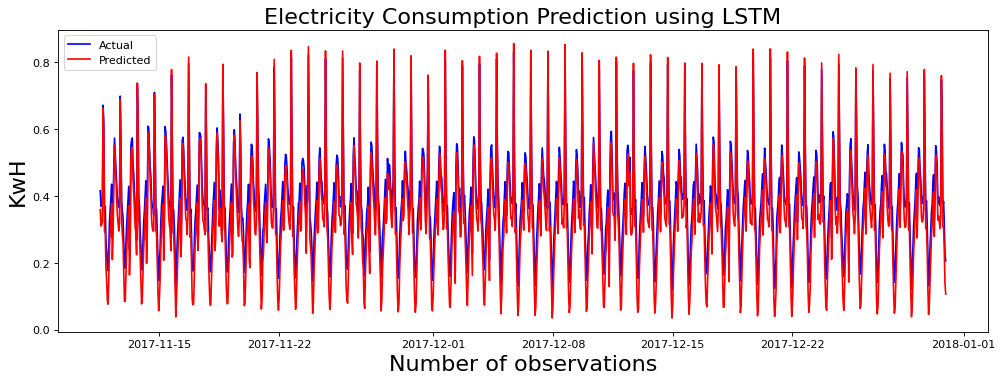

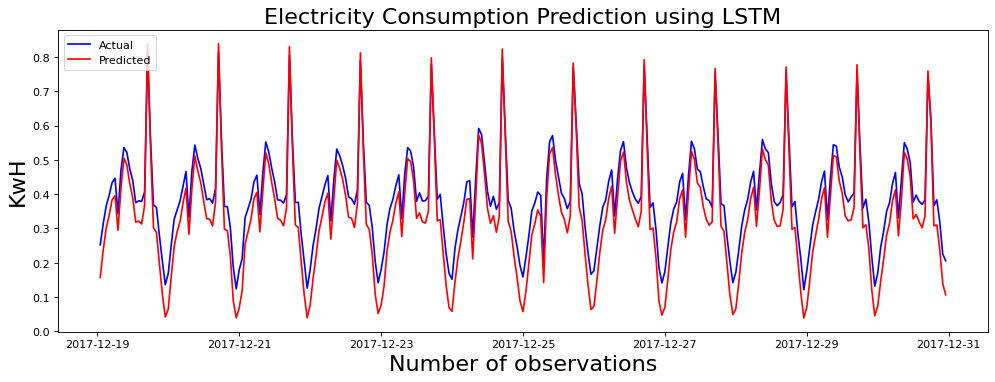

In [139]:
# Plot the actual versus prediction values
x = power_hour.index[7549:]
plt.figure(figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca() 
line1, = plt.plot(x, testY_new[7500:,],color = 'b',label='Actual')
line2,=  plt.plot(x, predicted_yhat[7500:,],'red',label='Predicted')
plt.title('Mean Consumption Forecast For Entire Horizon using LSTM', fontsize=20)
plt.ylabel('KwH', fontsize=20)
plt.xlabel('Number of observations', fontsize=20)

plt.legend(loc=2, prop={'size': 10})
#plt.savefig("MeanConsumptionForecast_LSTM.png", bbox_inches = "tight", dpi =150)
plt.show()

# Plot the actual versus prediction values for the last week
x = power_hour.index[8449:]
plt.figure(figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca() 
line1, = plt.plot(x, testY_new[8400:],color = 'b',label='Actual')
line2,=  plt.plot(x, predicted_yhat[8400:],'red',label='Predicted')
plt.title('Mean Consumption Forecast For Last Week using LSTM', fontsize=20)
plt.ylabel('kWh', fontsize=20)
plt.xlabel('Number of observations', fontsize=20)
plt.legend(loc=2, prop={'size': 10})
#plt.savefig("MeanConsumptionForecastLastWeek_LSTM.png", bbox_inches = "tight", dpi =150)
plt.show()